In [44]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math

In [36]:
# reading csv and convering to dataframe
df = pd.read_csv('..\data\possom_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           101 non-null    int64  
 1   population     101 non-null    object 
 2   sex            101 non-null    object 
 3   age            101 non-null    float64
 4   head_len       101 non-null    float64
 5   skull_width    101 non-null    float64
 6   total_len      101 non-null    float64
 7   tail_len       101 non-null    float64
 8   foot_len       101 non-null    float64
 9   ear_conch_len  101 non-null    float64
 10  eye            101 non-null    float64
 11  chest_girth    101 non-null    float64
 12  belly_girth    101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.4+ KB


## Linear Regression

In [37]:
# 'probably' independent variables
independents = ['site', 'age']

# 'probably' dependend variables
dependents = ['head_len', 'skull_width', 'total_len', 'tail_len', 'foot_len', 'ear_conch_len', 'eye', 'chest_girth', 'belly_girth']

In [38]:
independents_values = []
dependents_values = []

for var in independents:
    independents_values.append(np.array(df[var]).reshape(-1, 1))

for var in dependents:
    dependents_values.append(np.array(df[var]).reshape(-1, 1))

In [39]:
def plot_linear_regression(x, y, prediction, i_name, d_name)->None:
    plt.scatter(x, y, color = 'green')
    plt.plot(x, prediction, color = 'red')
    plt.title(i_name + ' vs ' + d_name)
    plt.xlabel(i_name)
    plt.ylabel(d_name)
    plt.show()

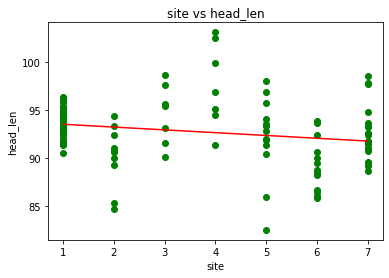

Mean square error:  11.788692482057927
Root mean square error:  3.4334665401104356


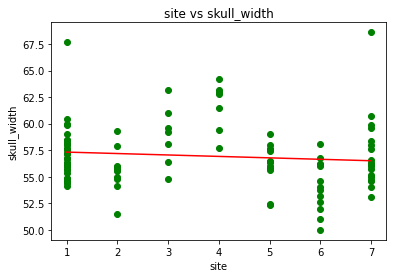

Mean square error:  9.429470744465842
Root mean square error:  3.0707443306901734


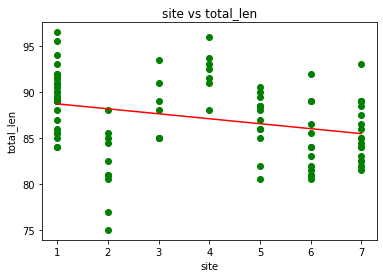

Mean square error:  15.820321298345227
Root mean square error:  3.9774767501954336


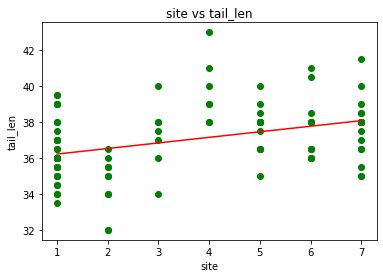

Mean square error:  3.316203312742289
Root mean square error:  1.8210445663800459


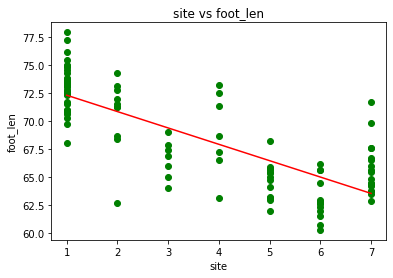

Mean square error:  7.507611858160118
Root mean square error:  2.7400021638969774


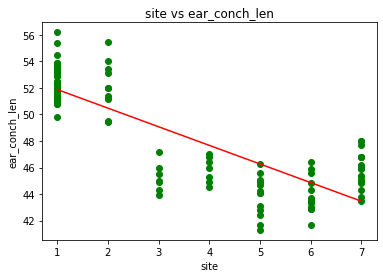

Mean square error:  5.385473503626207
Root mean square error:  2.32066229848856


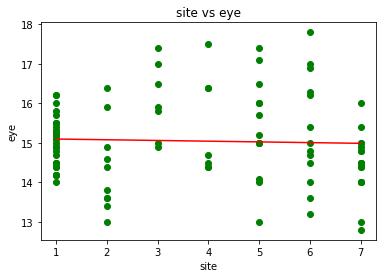

Mean square error:  1.1078135596423446
Root mean square error:  1.0525272251311815


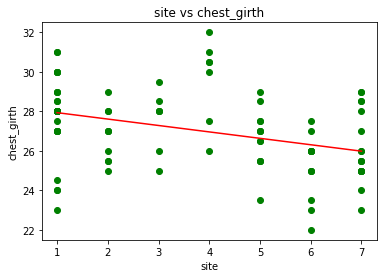

Mean square error:  3.458268005673707
Root mean square error:  1.8596419025376114


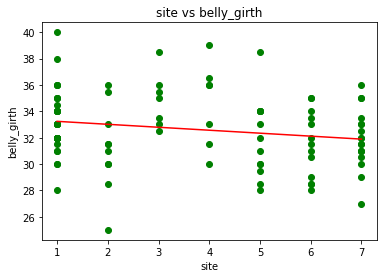

Mean square error:  7.086671503829894
Root mean square error:  2.6620802962776864


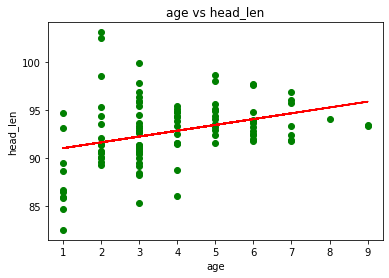

Mean square error:  10.927785854140124
Root mean square error:  3.3057201717840736


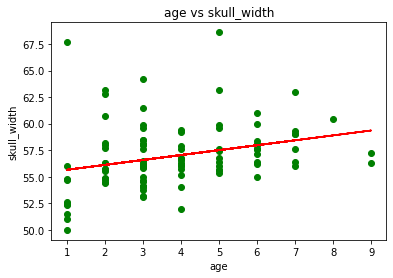

Mean square error:  8.754060421536405
Root mean square error:  2.958726148452473


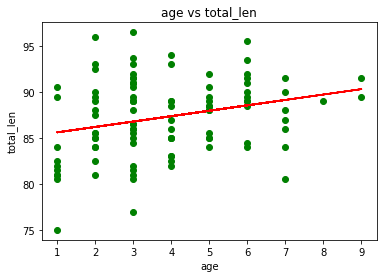

Mean square error:  16.18346060530579
Root mean square error:  4.0228672119901985


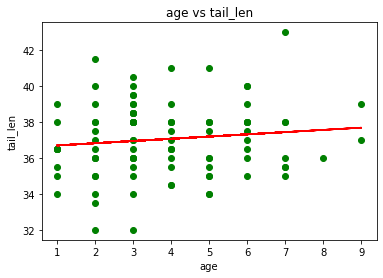

Mean square error:  3.793418391264165
Root mean square error:  1.9476699903382413


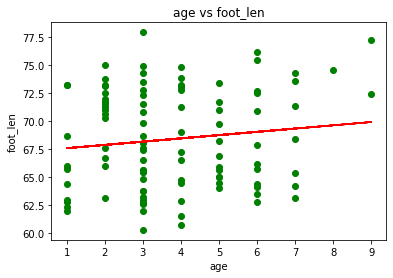

Mean square error:  18.979022320657812
Root mean square error:  4.356491974129852


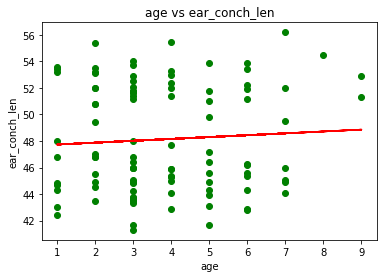

Mean square error:  16.251613271271527
Root mean square error:  4.0313289708570705


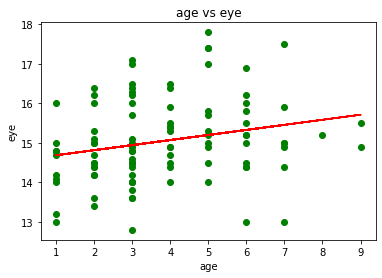

Mean square error:  1.0499772853979235
Root mean square error:  1.0246839929451048


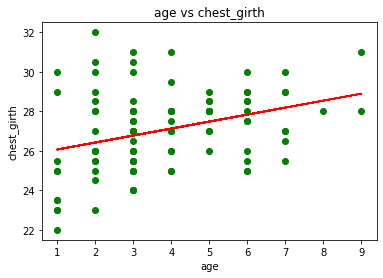

Mean square error:  3.5890925410902046
Root mean square error:  1.8944900477675264


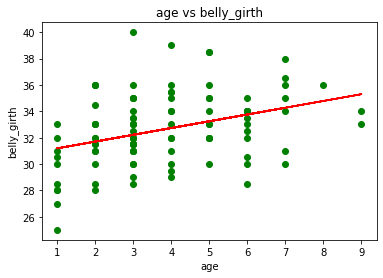

Mean square error:  6.407836551079389
Root mean square error:  2.5313704887035775


In [40]:
model = []
predict = []
model = [LinearRegression() for _ in range (0, 18)]
k = 0
for i, ivar in enumerate(independents_values):
    for d, dvar in enumerate(dependents_values):
        model[k].fit(ivar, dvar)
        predict.append(model[k].predict(ivar))
        plot_linear_regression(ivar, dvar, predict[k], independents[i], dependents[d])
        err = mean_squared_error(dvar, predict[k])
        print('Mean square error: ', err)
        print('Root mean square error: ', math.sqrt(err))
        k+=1


## Support Vector Regression

In [45]:
x= df['age']
y= df['total_len']

In [46]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[8. 6. 6. 6. 2. 1. 2. 6. 9. 6. 9. 5. 5. 3. 5. 4. 1. 2. 5. 4. 3. 3. 4. 2.
 3. 7. 2. 4. 3. 2. 3. 4. 3. 2. 4. 7. 2. 7. 1. 3. 3. 2. 3. 2. 5. 4. 5. 5.
 6. 3. 7. 2. 3. 4. 3. 2. 2. 7. 3. 6. 3. 5. 3. 4. 5. 5. 7. 6. 1. 1. 4. 6.
 5. 6. 1. 1. 1. 3. 4. 3. 3. 3. 3. 2. 2. 6. 3. 3. 2. 3. 7. 4. 4. 3. 5. 3.
 1. 1. 6. 4. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.